In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
df.shape

(2823, 25)

In [11]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-null obje

In [13]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# RFM Analysis

In [70]:
rfm_df = df[['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']]
rfm_df['ORDERDATE'] = pd.to_datetime(rfm_df['ORDERDATE'])
print('Shape:', rfm_df.shape)
rfm_df.head()

Shape: (2823, 4)


,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27


In [71]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 4 columns):
CUSTOMERNAME    2823 non-null object
ORDERNUMBER     2823 non-null int64
ORDERDATE       2823 non-null datetime64[ns]
SALES           2823 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 88.3+ KB


In [72]:
NOW = rfm_df['ORDERDATE'].max()

In [73]:
rfm_table = rfm_df.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (NOW - x.max()).days,
                                                  'ORDERNUMBER': lambda x: len(x.unique()),
                                                  'SALES': lambda x: x.sum()})

rfm_table = rfm_table.rename(columns={'ORDERDATE': 'recency', 
                                      'ORDERNUMBER': 'frequency',
                                      'SALES': 'monetary_value'})

In [74]:
rfm_table.head()

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",195,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,264,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,187,3,24179.96


In [75]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75]).to_dict()
quantiles

{'recency': {0.25: 80.25, 0.5: 185.0, 0.75: 229.25},
 'frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 3.0},
 'monetary_value': {0.25: 70129.4325, 0.5: 86522.61, 0.75: 120575.875}}

In [76]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [78]:
rfm_table['R_Quartile'] = rfm_table['recency'].apply(R_Class, args=('recency',quantiles,))
rfm_table['F_Quartile'] = rfm_table['frequency'].apply(FM_Class, args=('frequency',quantiles,))
rfm_table['M_Quartile'] = rfm_table['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))

rfm_table['RFMClass'] = (rfm_table['R_Quartile'].map(str)
                        + rfm_table['F_Quartile'].map(str)
                        + rfm_table['M_Quartile'].map(str))

rfm_table.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",195,3,157807.81,3,3,1,331
Alpha Cognac,64,3,70488.44,1,3,3,133
Amica Models & Co.,264,2,94117.26,4,4,2,442
"Anna's Decorations, Ltd",83,4,153996.13,2,1,1,211
Atelier graphique,187,3,24179.96,3,3,4,334


In [79]:
# Best Customers
rfm_table[rfm_table['RFMClass'] == '111'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,1,1,1,111
Mini Gifts Distributors Ltd.,2,17,654858.06,1,1,1,111
La Rochelle Gifts,0,4,180124.90,1,1,1,111
The Sharp Gifts Warehouse,39,4,160010.27,1,1,1,111
Souveniers And Things Co.,2,4,151570.98,1,1,1,111


In [80]:
# Customers on Verge of Churn
rfm_table[rfm_table['R_Quartile'] >= 3].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,197,4,164069.44,3,1,1,311
"AV Stores, Co.",195,3,157807.81,3,3,1,331
"Saveley & Henriot, Co.",455,3,142874.25,4,3,1,431
Rovelli Gifts,200,3,137955.72,3,3,1,331
Online Diecast Creations Co.,208,3,131685.30,3,3,1,331


In [88]:
# Lost Cheap Customers
rfm_table[rfm_table['RFMClass'] == '444'].sort_values('recency', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"Men 'R' US Retailers, Ltd.",508,2,48048.46,4,4,4,444
"Double Decker Gift Stores, Ltd",495,2,36019.04,4,4,4,444
West Coast Collectables Co.,488,2,46084.64,4,4,4,444
Signal Collectibles Ltd.,476,2,50218.51,4,4,4,444
Daedalus Designs Imports,465,2,69052.41,4,4,4,444


In [85]:
# Almost Lost Customer
rfm_table[rfm_table['RFMClass'] == '311'].sort_values('recency', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,197,4,164069.44,3,1,1,311


In [84]:
# Loyal Customers
rfm_table[rfm_table['F_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,1,1,1,111
Mini Gifts Distributors Ltd.,2,17,654858.06,1,1,1,111
"Australian Collectors, Co.",183,5,200995.41,2,1,1,211
Muscle Machine Inc,181,4,197736.94,2,1,1,211
La Rochelle Gifts,0,4,180124.90,1,1,1,111


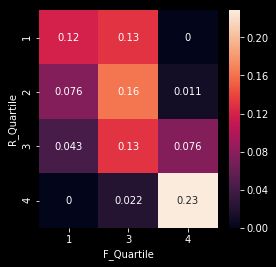

In [92]:
sns.heatmap(pd.crosstab(rfm_table['R_Quartile'], rfm_table['F_Quartile'], normalize=True), annot=True)
plt.show()